In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np

In [347]:
data=pd.read_csv("train-chennai-sale.csv")

# Data Cleaning

In [348]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [349]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [350]:
#Chrompt,Chrmpet,Chormpet These Values Needs to be Changed to "Chrompet"
data.AREA[data['AREA'].isin(["Chrompt","Chrmpet","Chormpet"])]="Chrompet"
#Karapakam This Values Needs to be Changed to "Karapakkam"
data.AREA[data['AREA']=="Karapakam"]="Karapakkam"
#KKNagar This Values Needs to be Changed to "KK Nagar"
data.AREA[data['AREA']=="KKNagar"]="KK Nagar"
#Velchery This Values Needs to be Changed to "Velachery"
data.AREA[data['AREA']=="Velchery"]="Velachery"
#Ana Nagar,Ann Nagar These Values Needs to be Changed to "Anna Nagar"
data.AREA[data['AREA'].isin(["Ana Nagar","Ann Nagar"])]="Anna Nagar"
#TNagar This Values Needs to be Changed to "T Nagar"
data.AREA[data['AREA']=="TNagar"]="T Nagar"
#Adyr This Values Needs to be Changed to "Adyar"
data.AREA[data['AREA']=="Adyr"]="Adyar"

<ipython-input-350-14e0ad7598af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.AREA[data['AREA'].isin(["Chrompt","Chrmpet","Chormpet"])]="Chrompet"
<ipython-input-350-14e0ad7598af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.AREA[data['AREA']=="Karapakam"]="Karapakkam"
<ipython-input-350-14e0ad7598af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.AREA[data['AREA']=="KKNagar"]="KK Nagar"
<ipython-input-350-14e0

In [351]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [352]:
data.INT_SQFT.value_counts()

1781    18
1538    15
1514    13
1505    13
786     12
        ..
2111     1
2127     1
2139     1
2147     1
2087     1
Name: INT_SQFT, Length: 1699, dtype: int64

In [353]:
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])

In [354]:
data.DIST_MAINROAD.value_counts()

39     56
51     53
78     52
77     49
14     48
       ..
127    24
33     24
136    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [355]:
data[data['N_BEDROOM'].isnull()]
# One record having the NaN value for N_BEDROOM and needs to be filled with "Median"value
data.N_BEDROOM[data['N_BEDROOM'].isnull()]=data.N_BEDROOM.median()

<ipython-input-355-599f1d94e9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.N_BEDROOM[data['N_BEDROOM'].isnull()]=data.N_BEDROOM.median()


In [356]:
data[data['N_BATHROOM'].isnull()]
# Five records having the NaN value for N_BEDROOM and needs to be filled with "Median"value
data.N_BATHROOM[data['N_BATHROOM'].isnull()]=data.N_BATHROOM.median()

<ipython-input-356-94003c17f241>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.N_BATHROOM[data['N_BATHROOM'].isnull()]=data.N_BATHROOM.median()


In [357]:
data[data['N_ROOM'].isna()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [358]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [359]:
#AdjLand This Values Needs to be Changed to "Adj Land"
data.SALE_COND[data['SALE_COND']=="AdjLand"]="Adj Land"
#Partiall,PartiaLl These Values Needs to be Changed to "Partial"
data.SALE_COND[data['SALE_COND'].isin(["Partiall","PartiaLl"])]="Partial"
#Ab Normal This Values Needs to be Changed to "AbNormal"
data.SALE_COND[data['SALE_COND']=="Ab Normal"]="AbNormal"

<ipython-input-359-9746d222d029>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.SALE_COND[data['SALE_COND']=="AdjLand"]="Adj Land"
<ipython-input-359-9746d222d029>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.SALE_COND[data['SALE_COND'].isin(["Partiall","PartiaLl"])]="Partial"
<ipython-input-359-9746d222d029>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.SALE_COND[data['SALE_COND']=="Ab Normal"]="AbNormal"


In [360]:
data.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [361]:
data.PARK_FACIL.value_counts()
#"Noo" This Values Needs to be Changed to "No"
data.PARK_FACIL[data['PARK_FACIL']=="Noo"]="No"

<ipython-input-361-78f64c096bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.PARK_FACIL[data['PARK_FACIL']=="Noo"]="No"


In [362]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [363]:
#DATE_BUILD needs to conveted as Datatime type
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])

In [364]:
data.BUILDTYPE.value_counts()
#"Comercial" This Values Needs to be Changed to "Commercial"
data.BUILDTYPE[data['BUILDTYPE']=="Comercial"]="Commercial"
#"Other" This Values Needs to be Changed to "Others"
data.BUILDTYPE[data['BUILDTYPE']=="Other"]="Others"

<ipython-input-364-aedf3d4e311a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BUILDTYPE[data['BUILDTYPE']=="Comercial"]="Commercial"
<ipython-input-364-aedf3d4e311a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BUILDTYPE[data['BUILDTYPE']=="Other"]="Others"


In [365]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [366]:
data.UTILITY_AVAIL.value_counts()
#"AllPub" This Values Needs to be Changed to "All Pub"
data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="AllPub"]="All Pub"
#"NoSewr" This Values Needs to be Changed to "NoSeWa"
data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="NoSeWr"]="NoSeWa"
data.UTILITY_AVAIL[data["UTILITY_AVAIL"]=="NoSewr "]="NoSeWa"

<ipython-input-366-1c0d8f780e3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="AllPub"]="All Pub"
<ipython-input-366-1c0d8f780e3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="NoSeWr"]="NoSeWa"
<ipython-input-366-1c0d8f780e3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.UTILITY_AVAIL[data["UTILITY_AVAIL"]=="NoSewr "]="NoSeWa"


In [367]:
data.UTILITY_AVAIL.value_counts()

NoSeWa     3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [368]:
data.STREET.value_counts()
#"Pavd" This Values Needs to be Changed to "Paved"
data.STREET[data['STREET']=='Pavd']='Paved'
#"NoAccess" This Values Needs to be Changed to "No Access"
data.STREET[data['STREET']=='NoAccess']='No Access'

<ipython-input-368-528aa169236c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.STREET[data['STREET']=='Pavd']='Paved'
<ipython-input-368-528aa169236c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.STREET[data['STREET']=='NoAccess']='No Access'


In [369]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [370]:
data.MZZONE.value_counts()
# Data Looks Fine No Cleaning Needed.

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [371]:
data[data.QS_ROOMS.isna()]
# Data Looks Fine No Cleaning Needed.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [372]:
data[data.QS_BATHROOM.isnull()]
# Data Looks Fine No Cleaning Needed.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [373]:
data[data.QS_BEDROOM.isnull()]
# Data Looks Fine No Cleaning Needed.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [374]:
# Null records needs to be filled.
print("MEDIAN: " +str(data.QS_OVERALL.median()))
print("MEAN: "+str(round(data.QS_OVERALL.mean(),1)))
#Both Mean & MEDIAN values are same.So, we can use either Mean or Median.
data.QS_OVERALL[data.QS_OVERALL.isnull()]=round(data.QS_OVERALL.mean(),1)

MEDIAN: 3.5
MEAN: 3.5


<ipython-input-374-9a3a48e2fd5a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.QS_OVERALL[data.QS_OVERALL.isnull()]=round(data.QS_OVERALL.mean(),1)


In [375]:
data[data.REG_FEE.isnull()]
# Data Looks fine, No Cleaning Required.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [376]:
data[data.COMMIS.isnull()]
# Data Looks fine, No Cleaning Required.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [377]:
data[data.SALES_PRICE.isnull()]
# Data Looks fine, No Cleaning Required.

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

# Deriving New features

In [379]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [380]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'])

In [381]:

data.dtypes.value_counts()

object            8
int64             6
float64           6
datetime64[ns]    2
dtype: int64

In [382]:
data['SALE_YEAR'] = data['DATE_SALE'].dt.year
data['BUILD_YEAR'] = data['DATE_BUILD'].dt.year

In [383]:
data['AGE'] = data['SALE_YEAR']- data['BUILD_YEAR']

In [384]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,BUILD_YEAR,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [385]:
data = data.drop(['DATE_SALE','DATE_BUILD','SALE_YEAR','BUILD_YEAR'],axis=1)

In [386]:
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [387]:
data = data.drop(['REG_FEE','COMMIS'],axis=1)

In [388]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

# EDA

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

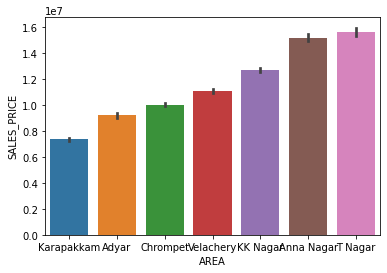

In [389]:
# We plot AREA V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='AREA',y="SALES_PRICE",data=data,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

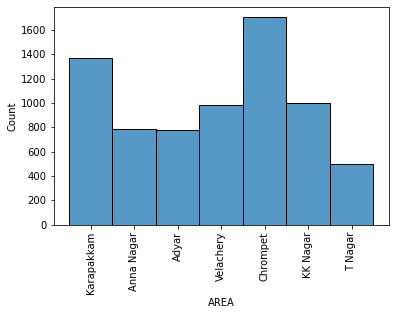

In [44]:
sns.histplot(data['AREA'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

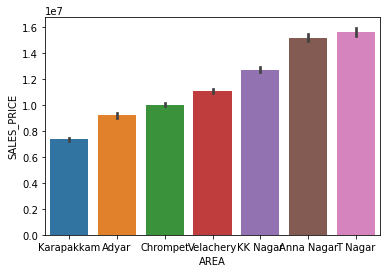

In [45]:
sns.barplot(x = data['AREA'],y=data['SALES_PRICE'],order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

Has a linear relationship


Label Encoding

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

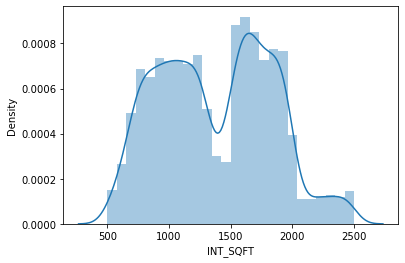

In [46]:
sns.distplot(data['INT_SQFT'])

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


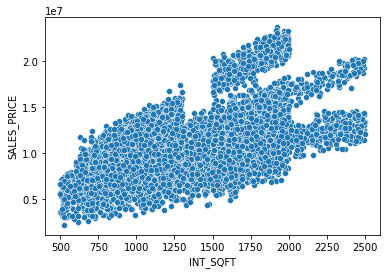

In [47]:
sns.scatterplot(data = data,x='INT_SQFT', y='SALES_PRICE')
data[['INT_SQFT','SALES_PRICE']].corr()

Has a linear relationship

No transformation required

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

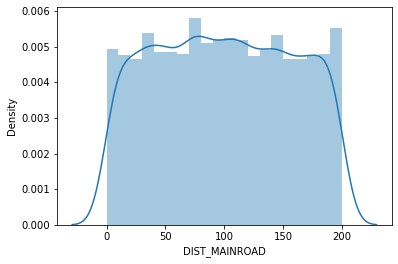

In [48]:
sns.distplot(data['DIST_MAINROAD'])

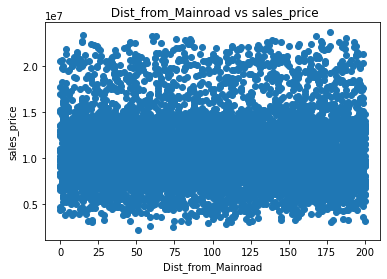

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [49]:
plt.scatter(data["DIST_MAINROAD"], data["SALES_PRICE"])
#plt.xticks(rotation= "vertical")
plt.title(" Dist_from_Mainroad vs sales_price")
plt.xlabel("Dist_from_Mainroad")
plt.ylabel("sales_price")
plt.show()
data[['DIST_MAINROAD','SALES_PRICE']].corr()

No linear relationship

We can ignore this feature as it doesn't affect our target

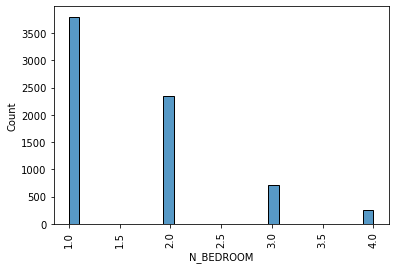

In [50]:
sns.histplot(data['N_BEDROOM'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

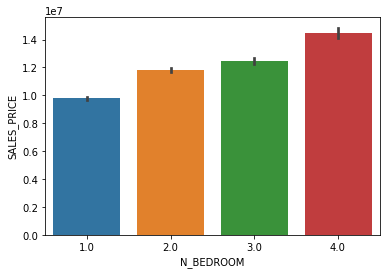

In [51]:
sns.barplot(data = data,x = 'N_BEDROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

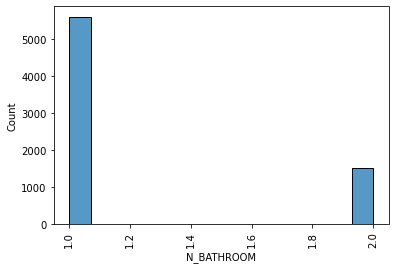

In [52]:
sns.histplot(data['N_BATHROOM'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

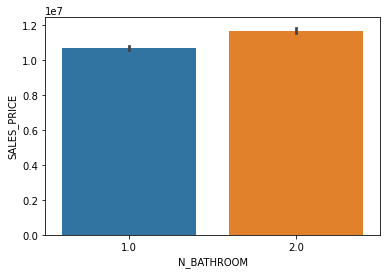

In [53]:

sns.barplot(data = data,x = 'N_BATHROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

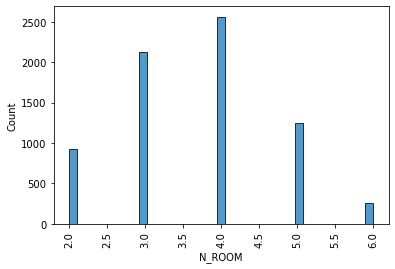

In [55]:
sns.histplot(data['N_ROOM'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

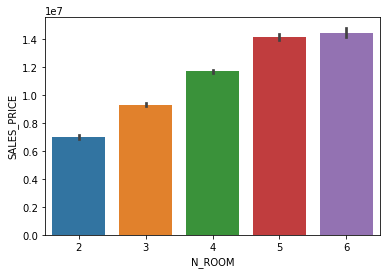

In [56]:
sns.barplot(data = data,x = 'N_ROOM', y = 'SALES_PRICE')

Has a linear relationship

No transformation required

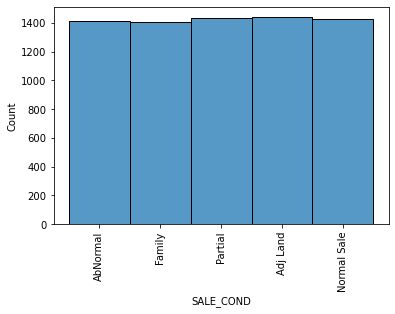

In [57]:
sns.histplot(data['SALE_COND'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

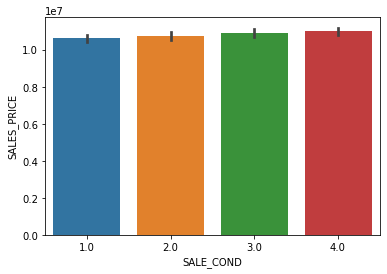

In [183]:
sns.barplot(data = data,x = 'SALE_COND', y = 'SALES_PRICE',order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])


Has a linear relationship

Label Encoding

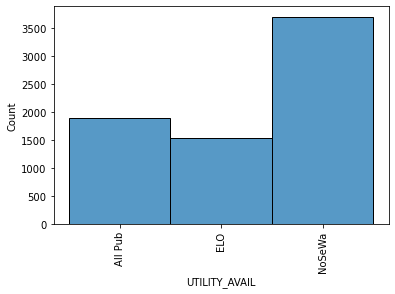

In [59]:
sns.histplot(data['UTILITY_AVAIL'])
plt.xticks(rotation='vertical')
plt.show()

,SALES_PRICE
SALES_PRICE,1.0


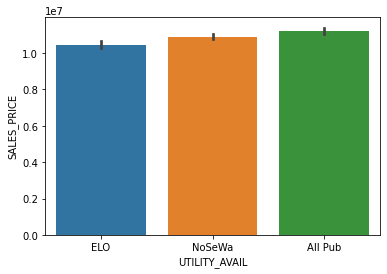

In [60]:
sns.barplot(data=data,x='UTILITY_AVAIL',y='SALES_PRICE',order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
data[['UTILITY_AVAIL','SALES_PRICE']].corr()

Has a linear relationship

Label Encoding

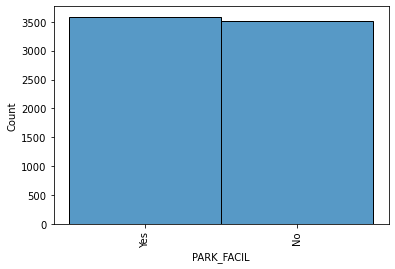

In [62]:
sns.histplot(data['PARK_FACIL'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

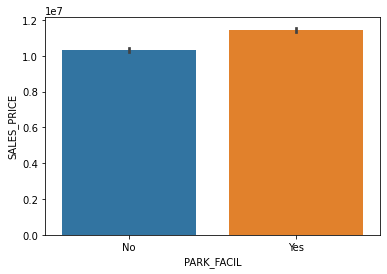

In [63]:
sns.barplot(data=data,x='PARK_FACIL',y='SALES_PRICE',order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])


Has a linear relationship

Label Encoding

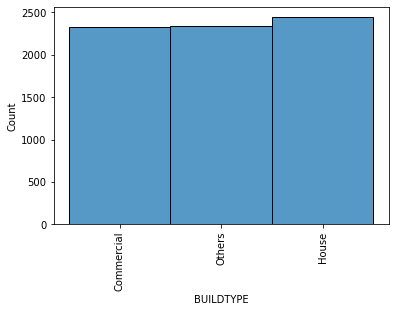

In [64]:
sns.histplot(data['BUILDTYPE'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

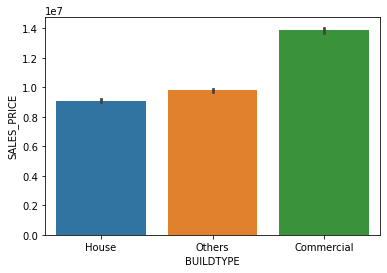

In [65]:
sns.barplot(data=data,x='BUILDTYPE',y='SALES_PRICE',order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])


No linear relationship

One-hot Encoding

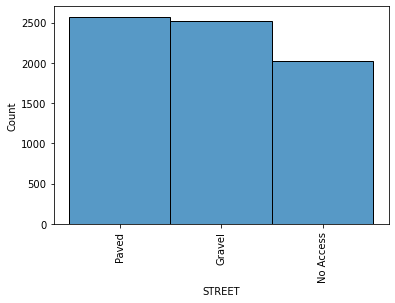

In [66]:
sns.histplot(data['STREET'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

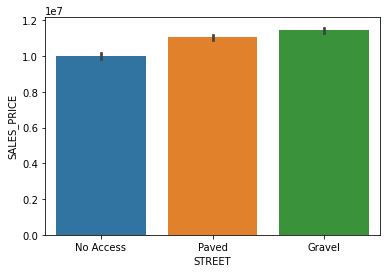

In [67]:
sns.barplot(data=data,x='STREET',y='SALES_PRICE',order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])


Has a linear relationship

Label Encoding

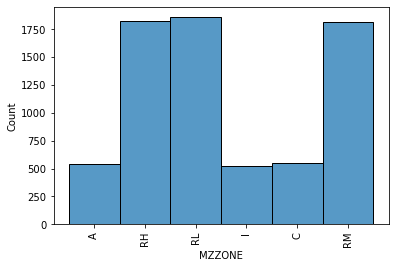

In [68]:
sns.histplot(data['MZZONE'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

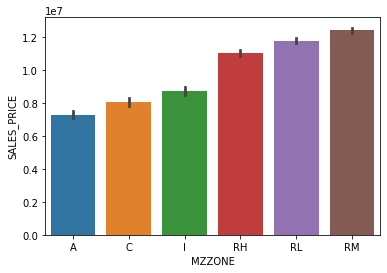

In [69]:
sns.barplot(data=data,x='MZZONE',y='SALES_PRICE',order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])


Has a linear relationship

Label Encoding

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

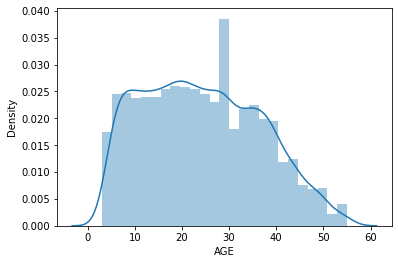

In [70]:
sns.distplot(data['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='SALES_PRICE'>

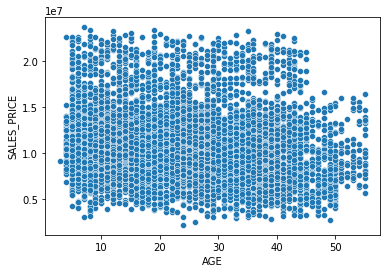

In [71]:
sns.scatterplot(data = data,x='AGE',y='SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_BEDROOM', ylabel='Density'>

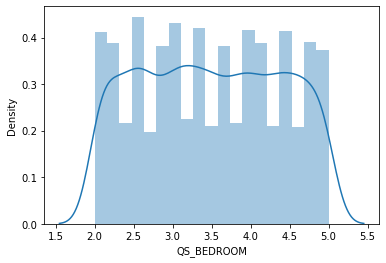

In [72]:
sns.distplot(data['QS_BEDROOM'])

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

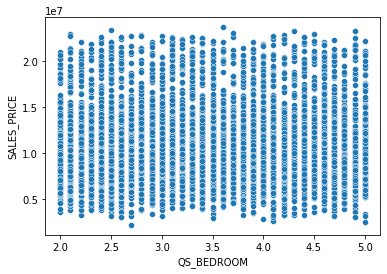

In [73]:
sns.scatterplot(data=data,x = 'QS_BEDROOM',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

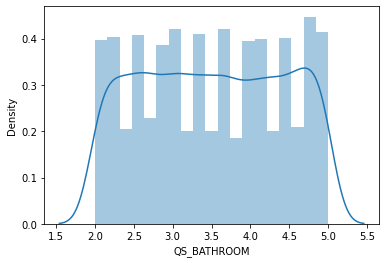

In [74]:
sns.distplot(data['QS_BATHROOM'])

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

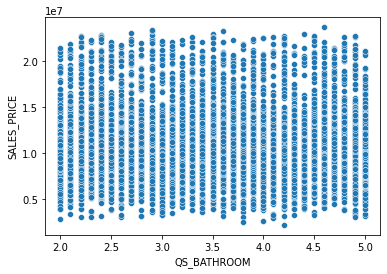

In [75]:
sns.scatterplot(data=data,x='QS_BATHROOM',y='SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

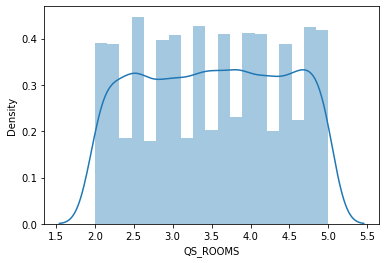

In [76]:
sns.distplot(data['QS_ROOMS'])

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

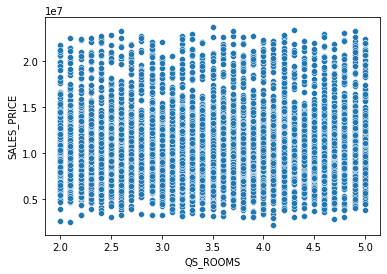

In [77]:
sns.scatterplot(data=data,x = 'QS_ROOMS',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

E:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

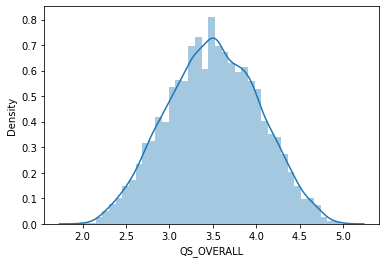

In [78]:
sns.distplot(data['QS_OVERALL'])

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

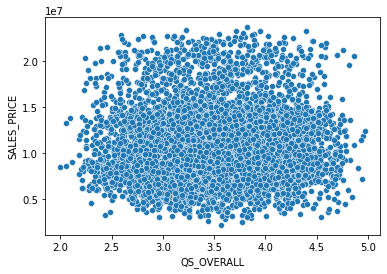

In [79]:
sns.scatterplot(data=data,x = 'QS_OVERALL',y = 'SALES_PRICE')

No linear relationship

We can ignore this feature as it doesn't affect our target

In [390]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013979,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017258,0.018783,-0.003559
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014240,0.330987,-0.045873
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007959,0.108834,-0.020403
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015406,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516143,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549046,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628167,0.018804,-0.017971
QS_OVERALL,0.013979,-0.017258,0.014240,0.007959,0.015406,0.516143,0.549046,0.628167,1.000000,0.020474,0.012517
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020474,1.000000,-0.118842


In [391]:
data.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020474
SALES_PRICE      1.000000
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

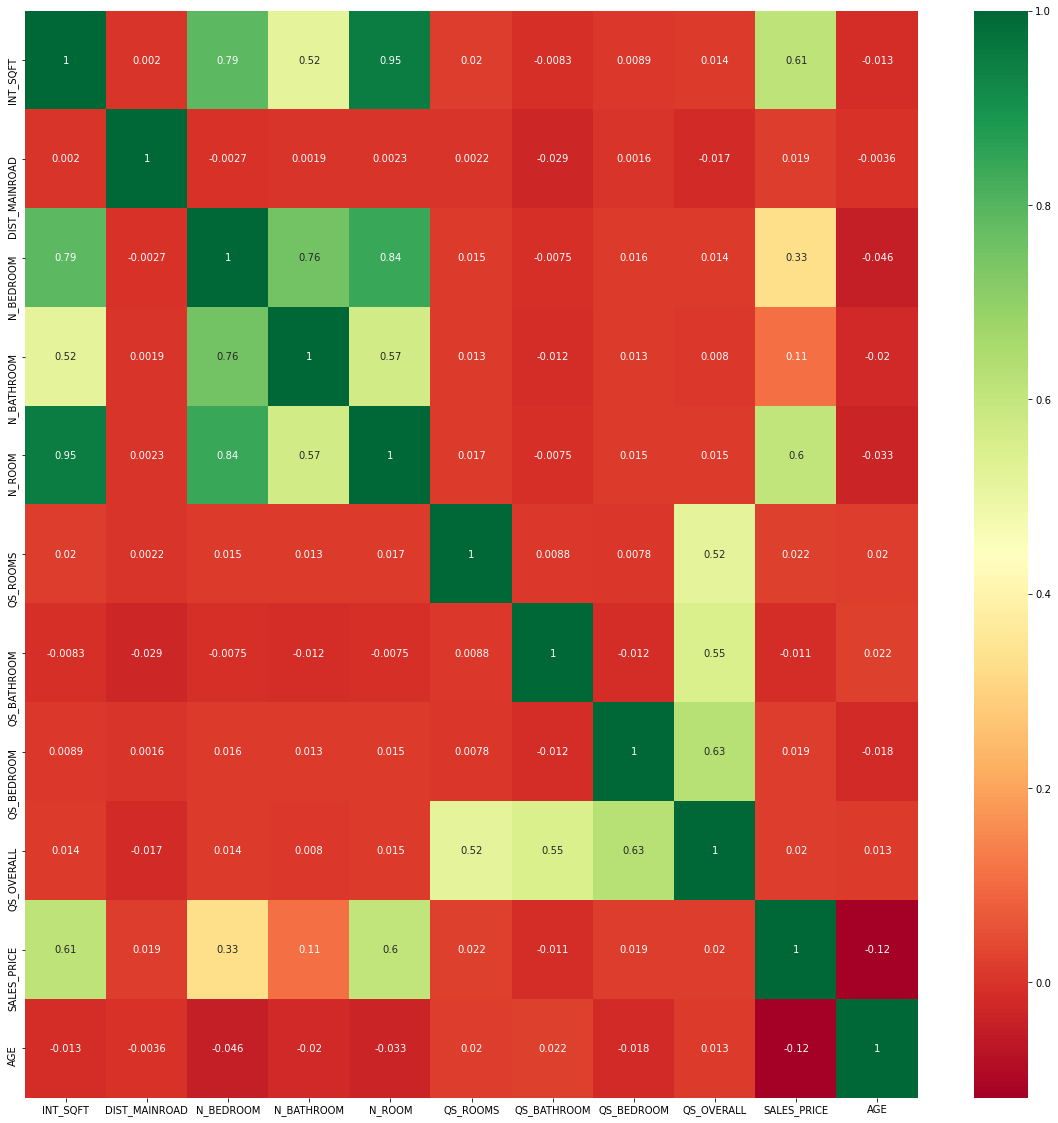

In [151]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [392]:
data.tail()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
7104,P03834,Karapakkam,598,51,1.0,1.0,2,Adj Land,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,5353000,49
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,10818480,9
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,8351410,28
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000,32
7108,P09794,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480,44


In [393]:
cat = [x for x in data.columns if data[x].dtype =='O']
print(len(cat))
cat

8


['PRT_ID',
 'AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

# Encoding

In [395]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data["AREA"]= data["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [396]:
data["SALE_COND"]= data["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'Adj Land':5})

In [397]:
data['PARK_FACIL'] = data['PARK_FACIL'].map({'Yes':2,'No':1})

In [398]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':3,'All Pub':6})

In [399]:
data['STREET'] = data['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})

In [400]:
data["MZZONE"]= data["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

In [401]:
dummies1 = pd.get_dummies(data["BUILDTYPE"])

In [402]:
data= pd.concat([data,dummies1], axis=1)

In [403]:
data = data.drop('BUILDTYPE',axis=1)

In [404]:
data = data.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [405]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1.0,1.0,3,3,2,6,3,1,7600000,44,1,0,0
1,6,1986,2.0,1.0,5,3,1,6,4,5,21717770,11,1,0,0
2,2,909,1.0,1.0,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,3.0,2.0,5,2,1,3,3,3,9630290,22,0,0,1
4,1,1226,1.0,1.0,3,3,2,6,4,2,7406250,30,0,0,1


In [406]:
X = data.drop('SALES_PRICE',axis = 1)
y = data['SALES_PRICE']

In [407]:
X.shape,y.shape

((7109, 14), (7109,))

In [394]:
data = data.drop(['PRT_ID'],axis=1)

In [408]:
data.isnull().sum()

AREA             0
INT_SQFT         0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE              0
Commercial       0
House            0
Others           0
dtype: int64

# Train_test_split

In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [410]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [411]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 14), (1422, 14), (5687,), (1422,))

# Linear Regression

In [412]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9239325707888841

In [413]:
y_pred= lr.predict(X_test)
y_pred

array([14087102.15714895, 13614838.16865547, 18490058.45369322, ...,
       13774793.93818773, 15831560.38820679,  8035175.98406675])

In [414]:
lr.intercept_

10925361.342535608

In [415]:
lr.coef_

array([ 1042781.42748623,   650552.06570827, -1288727.87333301,
         115738.52521587,  1788824.32760029,   224184.888264  ,
         521531.56103814,    59095.23061394,   392657.6980088 ,
         865700.76474868,  -213184.71033591,  1353768.57470841,
        -846830.47399525,  -502801.47658582])

In [416]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Co-efficient"])  
coef_df

,Co-efficient
AREA,1.042781e+06
INT_SQFT,6.505521e+05
N_BEDROOM,-1.288728e+06
N_BATHROOM,1.157385e+05
N_ROOM,1.788824e+06
SALE_COND,2.241849e+05
PARK_FACIL,5.215316e+05
UTILITY_AVAIL,5.909523e+04
STREET,3.926577e+05
MZZONE,8.657008e+05


In [417]:
from sklearn.metrics import r2_score
acc= r2_score(y_test,lr.predict(X_test))
acc

0.9239325707888841

# K Nearest Neighbour

In [418]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k = 4, 0.9479184353354475
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9230631553080961
K value  : 2 Cross Value Accuracy : 0.9419108290927843
K value  : 3 Cross Value Accuracy : 0.94567408055886
K value  : 4 Cross Value Accuracy : 0.9477312401245956
K value  : 5 Cross Value Accuracy : 0.9463397460094873
K value  : 6 Cross Value Accuracy : 0.945321431102899
K value  : 7 Cross Value Accuracy : 0.9442871074578214
K value  : 8 Cross Value Accuracy : 0.9431660736392795
K value  : 9 Cross Value Accuracy : 0.9416689912024536
K value  : 10 Cross Value Accuracy : 0.9403180548341494
K value  : 20 Cross Value Accuracy : 0.9292882022010354
K value  : 30 Cross Value Accuracy : 0.920510697568545
K value  : 40 Cross Value Accuracy : 0.9134811014452667
K value  : 50 Cross Value Accuracy : 0.9076467429897388


# Decision Tree

In [419]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth,random_state=0)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.3549736023125779 Cross Val Score: 0.3588875752516194
K: 2 R2 Score: 0.7003834039205055 Cross Val Score: 0.6819059001742293
K: 3 R2 Score: 0.8008214951832524 Cross Val Score: 0.8016324100218641
K: 4 R2 Score: 0.8807799567746913 Cross Val Score: 0.8820146308226893
K: 5 R2 Score: 0.9146638411022208 Cross Val Score: 0.9151939950985589
K: 6 R2 Score: 0.9370783882679491 Cross Val Score: 0.9358665043374771
K: 7 R2 Score: 0.9481395134303794 Cross Val Score: 0.9505404259155558
K: 8 R2 Score: 0.960324223329754 Cross Val Score: 0.9620416518309964
K: 9 R2 Score: 0.9665593542130841 Cross Val Score: 0.9690504418124626
K: 10 R2 Score: 0.9702458547732962 Cross Val Score: 0.9728641822419843
K: 20 R2 Score: 0.9753873173830112 Cross Val Score: 0.976489670464965
K: 40 R2 Score: 0.9748747187149105 Cross Val Score: 0.9766811141684919
K: 60 R2 Score: 0.9748747187149105 Cross Val Score: 0.9766811141684919
K: 70 R2 Score: 0.9748747187149105 Cross Val Score: 0.9766811141684919
K: 100 R2 Score: 

# Feature importance

In [420]:
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)  # area, int_sqft, commericial buildtype, mzzone , park_facl
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('AREA', 0.49),
 ('Commercial', 0.32),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('AGE', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('House', 0.0),
 ('Others', 0.0)]

In [421]:
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9753873173830112


In [422]:
data2= pd.DataFrame({"Actual": y_test, "Predicted": pred})
data2

,Actual,Predicted
3913,13376150,13697100.0
2726,12857440,12459280.0
6220,19124310,19627640.0
2716,4905000,4504250.0
5459,13534450,14239850.0
...,...,...
3524,9987005,9386685.0
3010,5821000,5710250.0
66,13364730,14086140.0
1642,17115030,17959010.0


# XG BOOST REGRESSOR

In [434]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  
print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)),2)


Learning rate :  1  Train score :  0.999480971287527  Cross-Val score :  0.9859017471354046 2


In [433]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Feature importance

In [436]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Commercial', 0.52006),
 ('AREA', 0.36116),
 ('MZZONE', 0.02452),
 ('House', 0.02088),
 ('INT_SQFT', 0.01842),
 ('PARK_FACIL', 0.018),
 ('N_ROOM', 0.01365),
 ('STREET', 0.01011),
 ('N_BATHROOM', 0.00564),
 ('SALE_COND', 0.00227),
 ('N_BEDROOM', 0.00225),
 ('AGE', 0.00133),
 ('UTILITY_AVAIL', 0.00096),
 ('Others', 0.00076)]

# Answers to Buyers:
    
Price of the property changes due to various factors. Top factors are:

1)Based on whether the property is Commercial,others or House

2)Based on the location of the property.

3)The price changes also on Availability of Parking.
4)Finally based on the Zone which the property belongs to



# Suggestions to Real estate agents:
    
Profit can be increased by considering the following factors:

1)It is recommended to construct a commercial bulding rather than residential or others.

2)Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

3)It is highly recommended to construct buildings with Parking Facility.

4)The Street of property should be Paved and it should have All Public facilites nearby.

